# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import DataFrame

In [2]:
df = pd.read_csv('data/Salary_multiple.csv')

# Preprocessing

In [3]:
df.head()

,YearsExperience,Field,Salary
0,1.1,Technical,39343.0
1,1.3,Non-Technical,26205.0
2,1.5,Technical,37731.0
3,2.0,Non-Technical,28525.0
4,2.2,Technical,39891.0


In [4]:
encoder = LabelEncoder()
df['Field'] = encoder.fit_transform(df['Field'])

In [5]:
df.head()

,YearsExperience,Field,Salary
0,1.1,1,39343.0
1,1.3,0,26205.0
2,1.5,1,37731.0
3,2.0,0,28525.0
4,2.2,1,39891.0


In [6]:
scaler = StandardScaler()
df[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])

# Split to X and Y

In [7]:
X = df[['YearsExperience']].values
y = df['Salary']

In [8]:
X=X.reshape(-1,1)

# Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Build Model

In [10]:
# Build the neural network model
model = Sequential([
    Dense(4, activation='linear', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid'),
    # Dense(1, activation='linear')  # No activation function for output layer (regression problem)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_absolute_error',metrics=['accuracy'])

In [13]:
len(X_train)

24

# Tensorboard

In [14]:
# log_dir = "logs/regression_tf/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/regression_tf/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8 , validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/50
3/3 [==============================] - 3s 424ms/step - loss: 1.1028 - accuracy: 0.0000e+00 - val_loss: 0.8652 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 155ms/step - loss: 1.0983 - accuracy: 0.0000e+00 - val_loss: 0.8625 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 142ms/step - loss: 1.0937 - accuracy: 0.0000e+00 - val_loss: 0.8598 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 127ms/step - loss: 1.0890 - accuracy: 0.0000e+00 - val_loss: 0.8570 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 109ms/step - loss: 1.0843 - accuracy: 0.0000e+00 - val_loss: 0.8542 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 84ms/step - loss: 1.0797 - accuracy: 0.0000e+00 - val_loss: 0.8514 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 82ms/step - loss: 1.0749 - accuracy: 0.0000e+00 - val_loss: 

In [16]:
y_pred = model.predict(X)

1/1 [==============================] - 0s 152ms/step


In [17]:
len(y_pred)

30

# Prediction

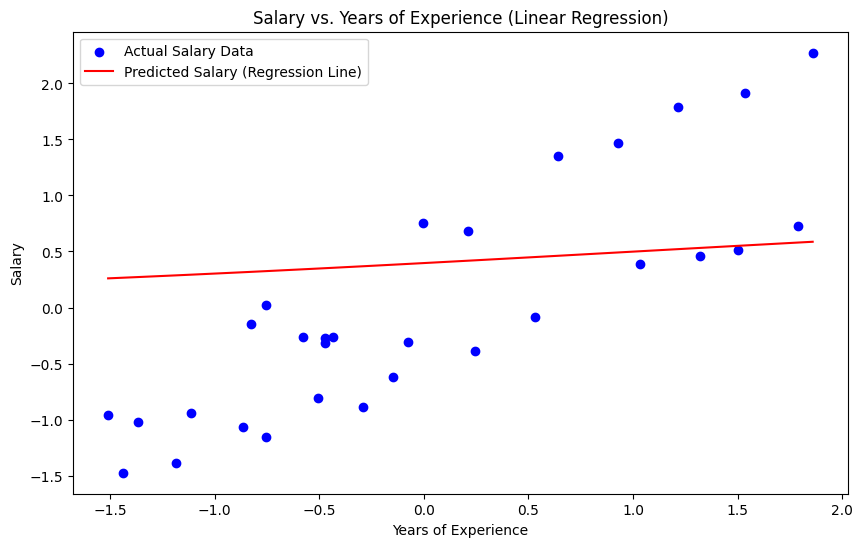

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Salary Data")
plt.plot(X, y_pred, color="red", label="Predicted Salary (Regression Line)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs. Years of Experience (Linear Regression)")
plt.legend()
plt.show()

# Get training Weights

In [19]:
model.layers[0].get_weights()

[array([[ 0.64878476,  0.92661875, -0.4354342 ,  0.10179966]],
       dtype=float32),
 array([ 0.08621053, -0.12835889, -0.04095585,  0.11560535], dtype=float32)]

In [20]:
for layers in model.layers:
    print(layers.get_weights())

[array([[ 0.64878476,  0.92661875, -0.4354342 ,  0.10179966]],
      dtype=float32), array([ 0.08621053, -0.12835889, -0.04095585,  0.11560535], dtype=float32)]
[array([[-0.5270546 ],
       [ 1.014356  ],
       [ 0.2349517 ],
       [-0.79996574]], dtype=float32), array([-0.14170437], dtype=float32)]


# Evaluate the model

In [21]:

loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

1/1 [==============================] - 0s 48ms/step - loss: 0.7727 - accuracy: 0.0000e+00
Test Loss: [0.7726860046386719, 0.0]


# Metrics

In [22]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 41ms/step


# Evaluate

In [23]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np

In [24]:
r_squared = r2_score(y_test,y_pred)
print("The R2 error is :", r_squared)

The R2 error is : 0.09291711162812599


In [25]:
mean_absolute_error(y_test,y_pred)

0.7726859887778686

In [26]:
mean_squared_error(y_test,y_pred)

0.9141194777211533

# Visualize

In [27]:
from tensorflow.keras.models import Model

# Activation from Each Layer

In [28]:
def get_activations(model, layer_name, X):
    layer = model.get_layer(name=layer_name)
    activation_model = Model(inputs=model.input, outputs=layer.output)
    activations = activation_model.predict(X, verbose=False)
    print(activations)
    return activations


In [29]:
def plot_activations(layer_name, activations):
    print(f"Layer: {layer_name}")
    print(f"Activation Shape: {activations.shape}")

    if len(activations.shape) == 2:
        # 2D activations (Dense layers)
        plt.figure(figsize=(10, 5))
        plt.bar(range(activations.shape[1]), activations[0], color='skyblue')
        plt.title(f'Activations of {layer_name}')
        plt.xlabel('Neurons')
        plt.ylabel('Activation')
        plt.grid(True)
        plt.show()
    
    elif len(activations.shape) == 3:
        # 3D activations (Convolutional layers)
        num_channels = activations.shape[-1]
        for i in range(num_channels):
            plt.figure(figsize=(10, 5))
            plt.imshow(activations[0, :, :, i], aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Activations of {layer_name} - Channel {i}')
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.show()

    elif len(activations.shape) == 4:
        # 4D activations (Batches of 3D data, e.g., convolutional layers)
        num_samples = activations.shape[1]
        for i in range(num_samples):
            plt.figure(figsize=(10, 5))
            plt.imshow(activations[0, i, :, :], aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Activations of {layer_name} - Sample {i}')
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.show()

    else:
        print(f"Activation shape {activations.shape} not supported for visualization")

[[ 0.50165266  0.46499115 -0.3197813   0.18079163]]
Layer: dense
Activation Shape: (1, 4)


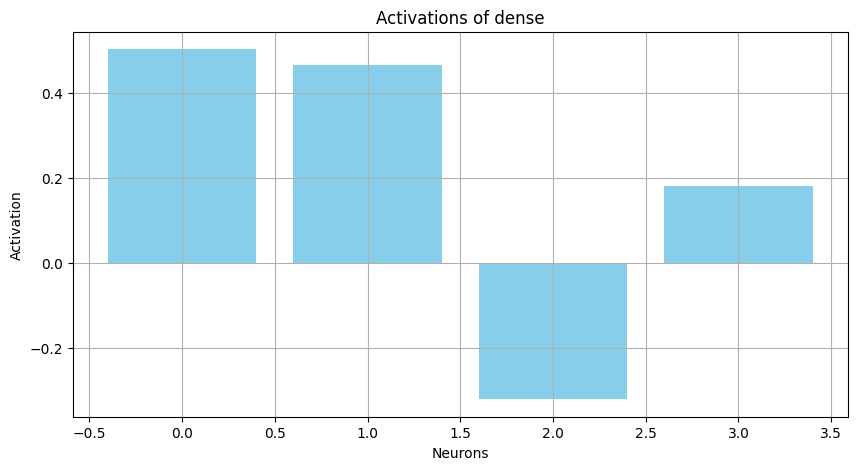

[[0.4615271]]
Layer: dense_1
Activation Shape: (1, 1)


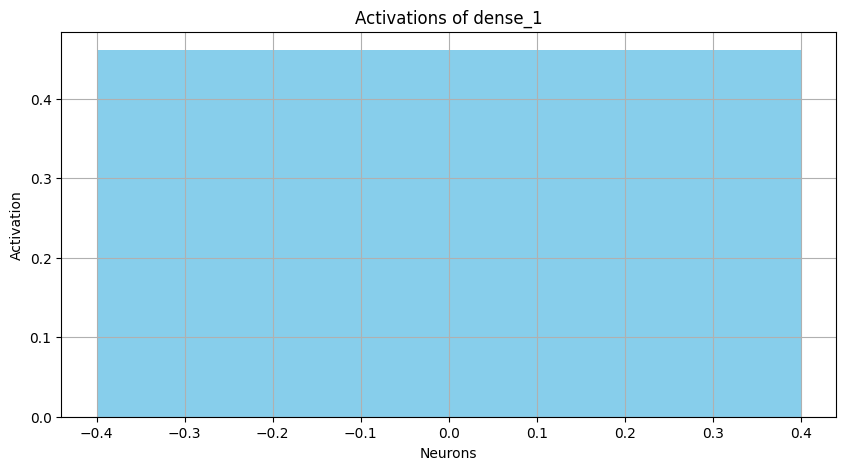

In [30]:
layer_names = [layer.name for layer in model.layers]

X_sample = X_train[23]
X_sample = np.expand_dims(X_sample, axis=0)  

for layer_name in layer_names:
    activations = get_activations(model, layer_name, X_sample)
    plot_activations(layer_name, activations)

[[-0.21917042 -0.5645154   0.16400167  0.06768857]]
Layer: dense
Activation Shape: (1, 4)


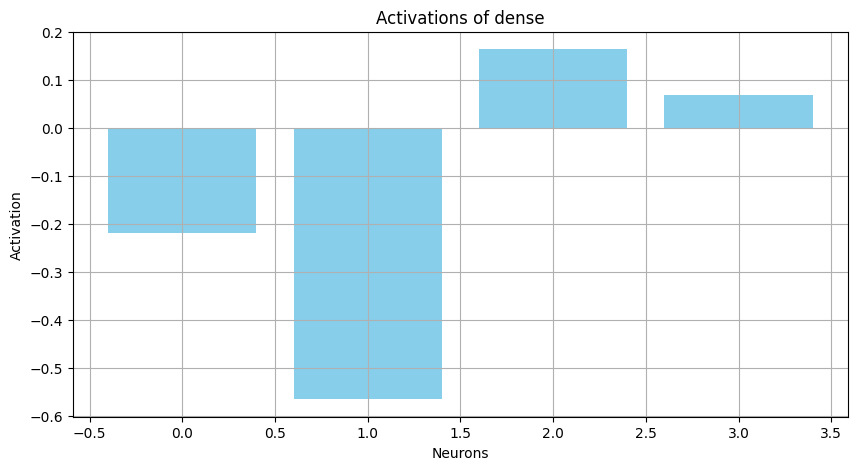

[[0.3510504]]
Layer: dense_1
Activation Shape: (1, 1)


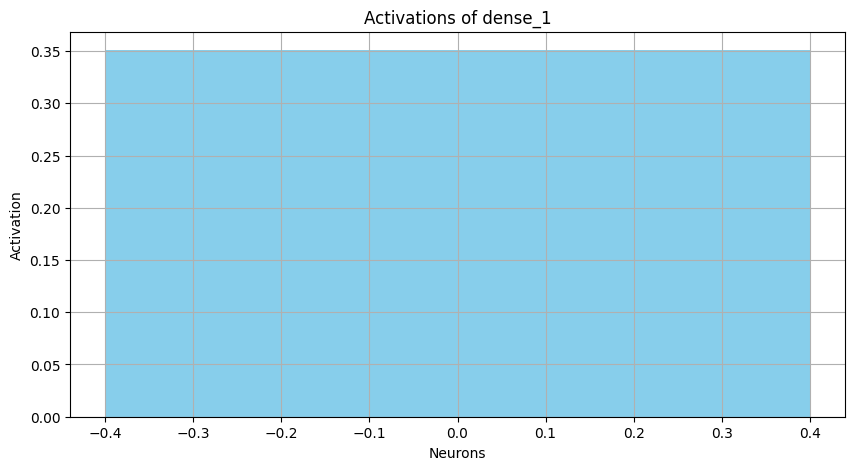

In [31]:
layer_names = [layer.name for layer in model.layers]

X_sample = X_train[11]
X_sample = np.expand_dims(X_sample, axis=0)  

for layer_name in layer_names:
    activations = get_activations(model, layer_name, X_sample)
    plot_activations(layer_name, activations)